In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/imdb_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


In [ ]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


In [ ]:
# Fixando o tipo dos dados e lidando com valores nulos
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Preenchendo valores ausentes em 'release_date' usando o método de interpolação com distribuição linear
df['release_date'] = df['release_date'].interpolate(method='linear', limit_direction='forward')

# Preenchendo valores ausentes em 'gross' com a mediana (mediana é menos sensível à outliers e representa melhor distribuições assimétricas)
df['gross'] = df['gross'].fillna(df['gross'].median())


In [ ]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [ ]:
df

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,2020-09-11,Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,2021-06-30,Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,2021-02-01,Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,2021-07-01,Adam Robitel


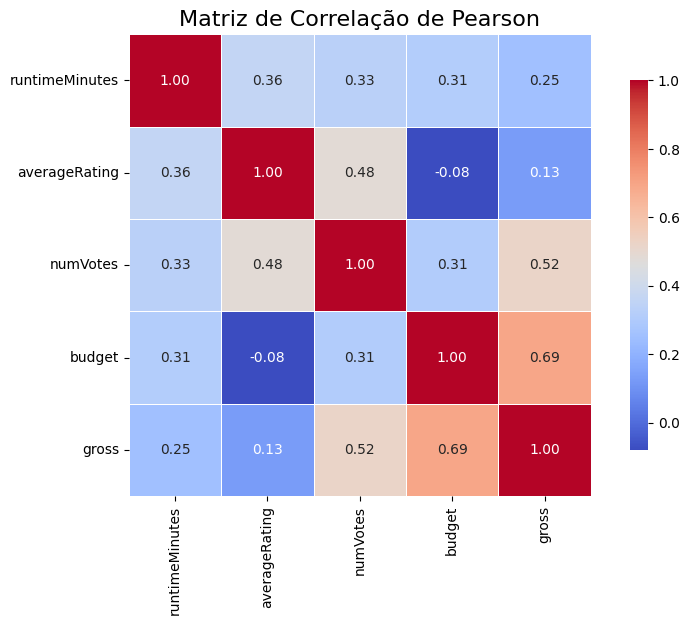

In [ ]:
'''
matriz de correlação das variáveis numéricas
'''


# Seleciona apenas as colunas numéricas
colunas_numericas = df[['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']]

# Calcula a matriz de correlação de Pearson
matriz_correlacao = colunas_numericas.corr(method='pearson')

# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando um mapa de calor (heatmap) para a matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Ajuste do título
plt.title('Matriz de Correlação de Pearson', fontsize=16)

# Exibir o gráfico
plt.show()

In [ ]:
#separa os generos da coluna genre e conta valores unicos
generos = df['genres'].str.split(',').explode().unique()
print(f'Number of genres: {len(generos)}')
print(generos)

Number of genres: 22
['Comedy' 'Fantasy' 'Romance' 'Adventure' 'Animation' 'War' 'Drama'
 'Biography' 'Sci-Fi' 'Thriller' 'Crime' 'Action' 'Family' 'Musical'
 'Music' 'Mystery' 'Western' 'Horror' 'History' 'Sport' 'Documentary'
 'News']


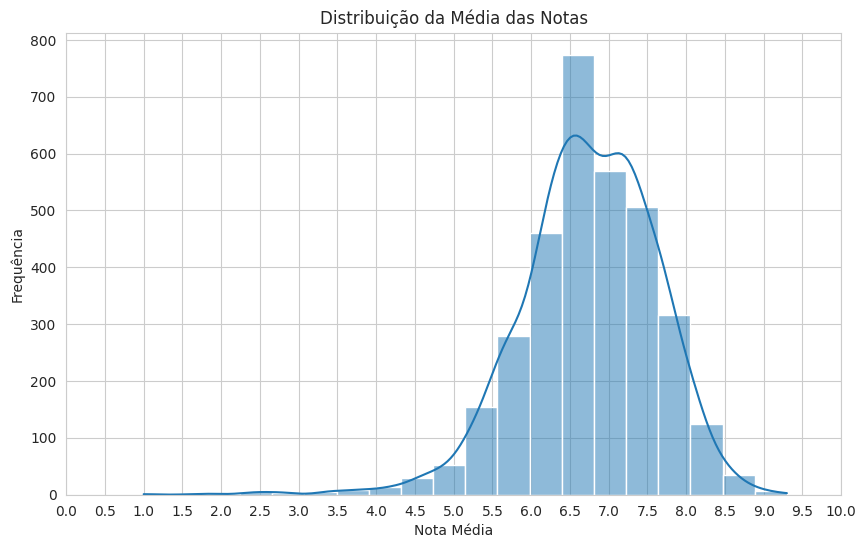

In [ ]:
# Distribution of average ratings
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['averageRating'].dropna(), kde=True, bins=20)
plt.title('Distribuição da Média das Notas')
plt.xlabel('Nota Média')
plt.ylabel('Frequência')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.show()

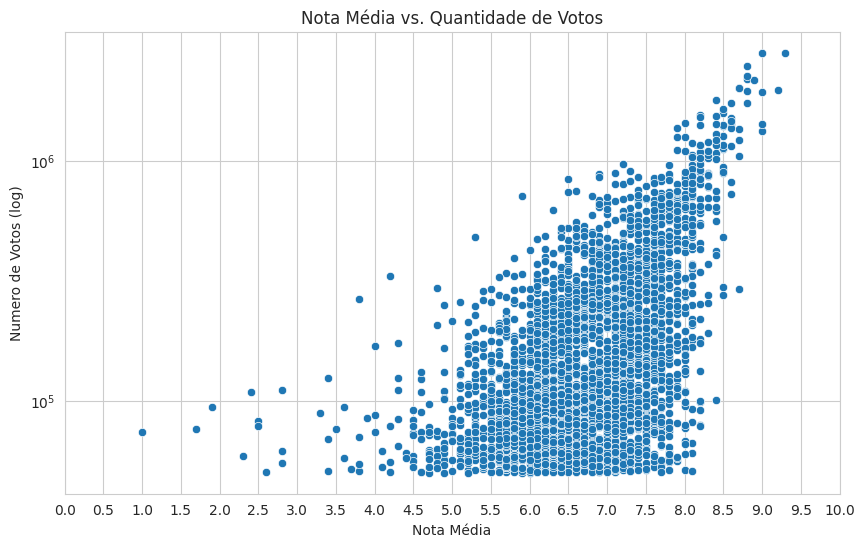

In [ ]:
# *Most of the films' average ratings on IMDB fall around 6.5.*
# Scatter plot of average rating vs. number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='averageRating', y='numVotes')
plt.yscale('log')
plt.title('Nota Média vs. Quantidade de Votos')
plt.xlabel('Nota Média')
plt.ylabel('Numero de Votos (log)')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.show()

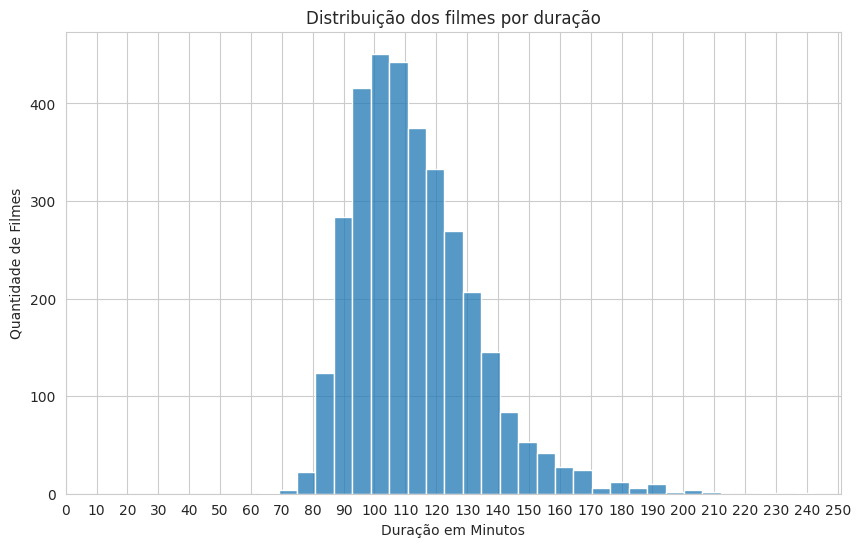

In [ ]:
# *There does not seem to be a strong relationship between average rating and the number of votes.*
# Distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['runtimeMinutes'].dropna(), bins=30, kde=False)
plt.title('Distribuição dos filmes por duração')
plt.xlabel('Duração em Minutos')
plt.ylabel('Quantidade de Filmes')
plt.xticks(np.arange(0, 260, 10))
plt.show()

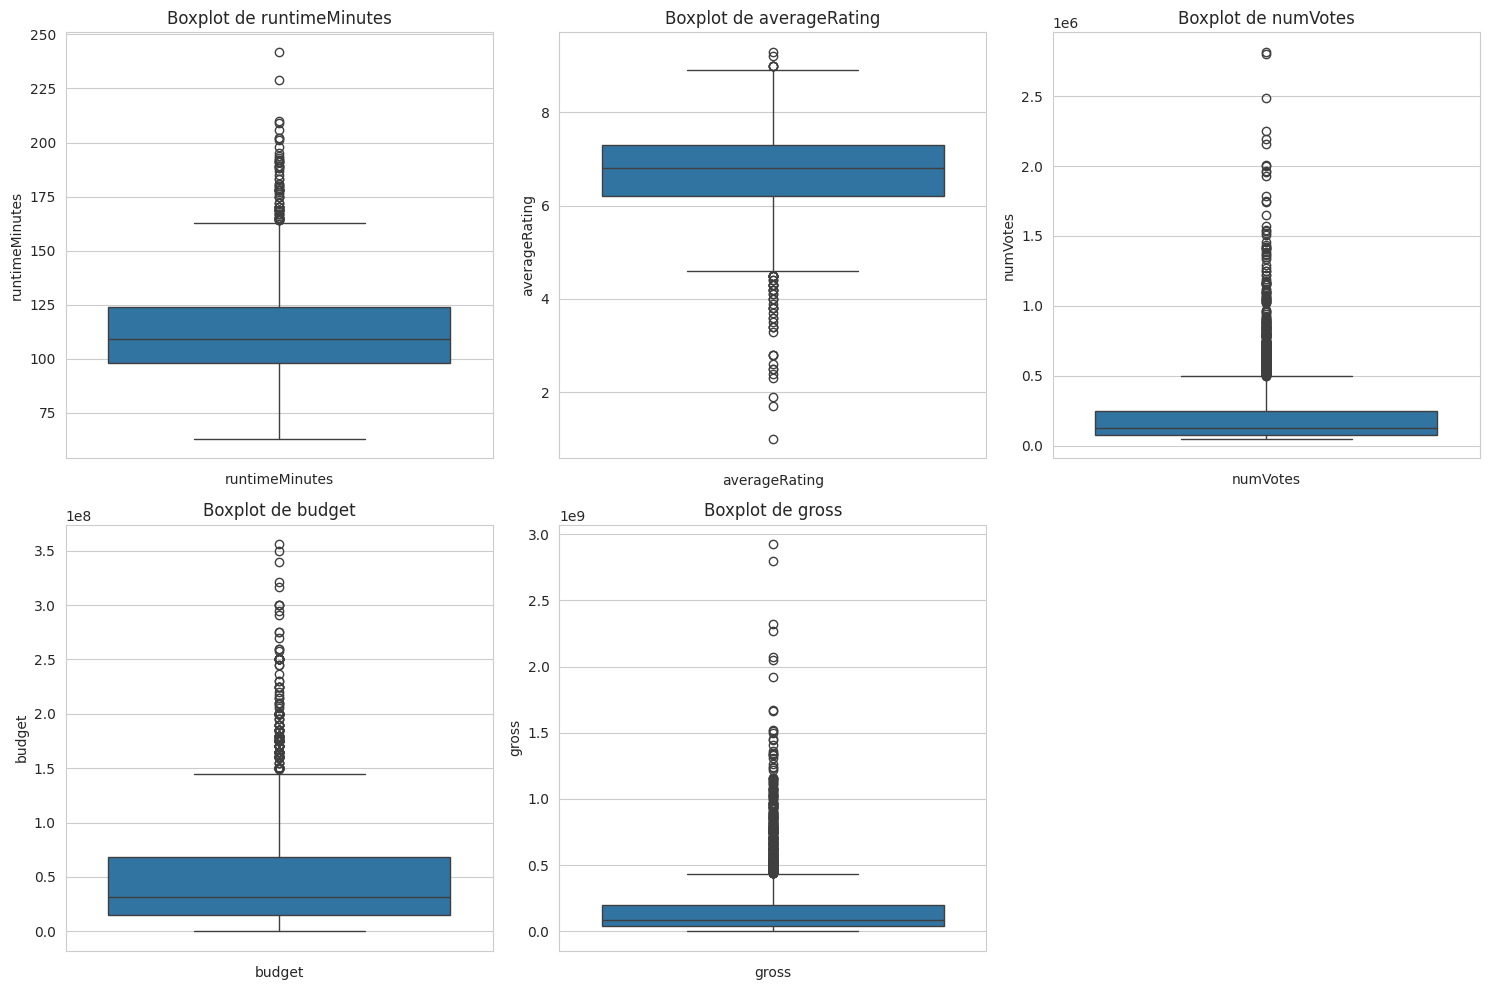

In [ ]:
# Selecionar apenas colunas numéricas
numeric_columns = ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar boxplots para cada coluna numérica
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Organizar em 2 linhas e 3 colunas
    sns.boxplot(y=df[column].dropna())
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

# Ajustar o layout
plt.tight_layout()
plt.show()

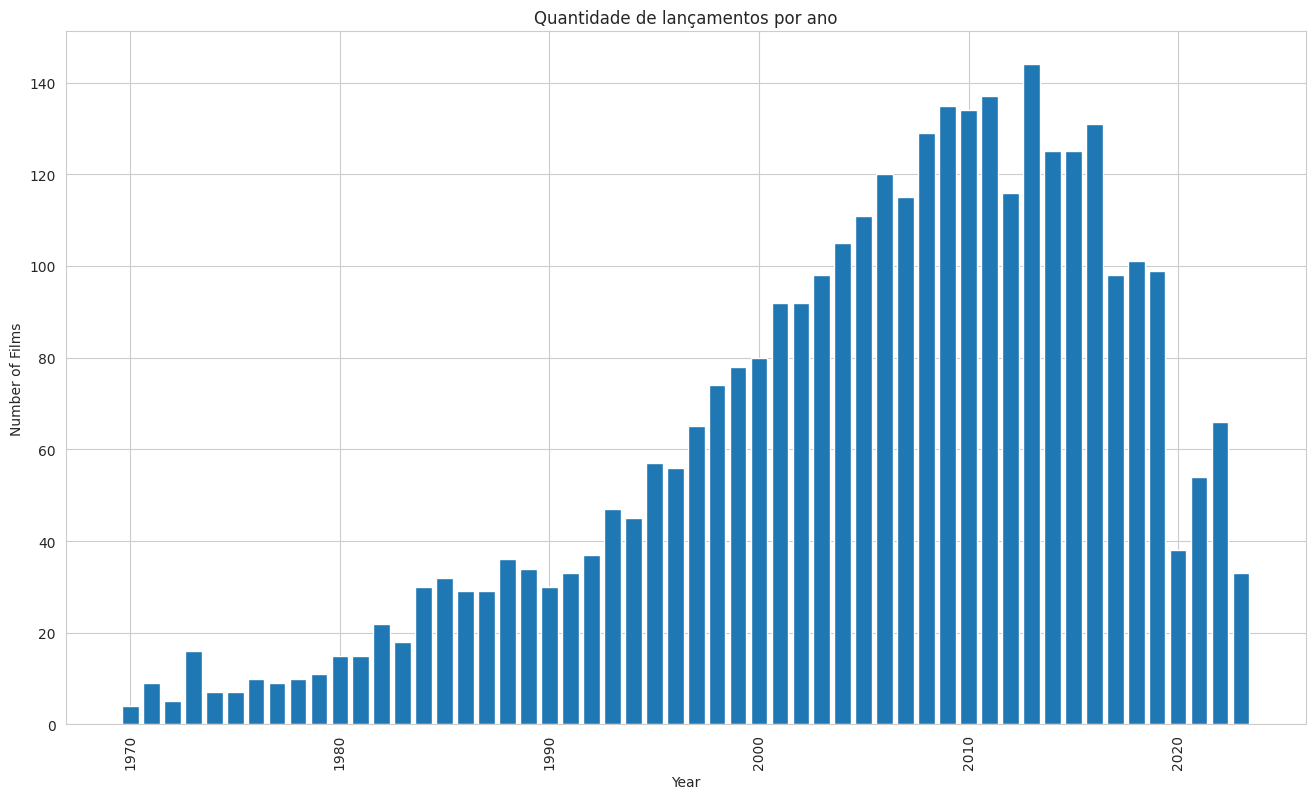

In [ ]:
#Quantidade de lançamentos por ano
df['release_year'] = df['release_date'].dt.year
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(16, 9))
plt.bar(year_counts.index, year_counts.values)
plt.title('Quantidade de lançamentos por ano')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.show()

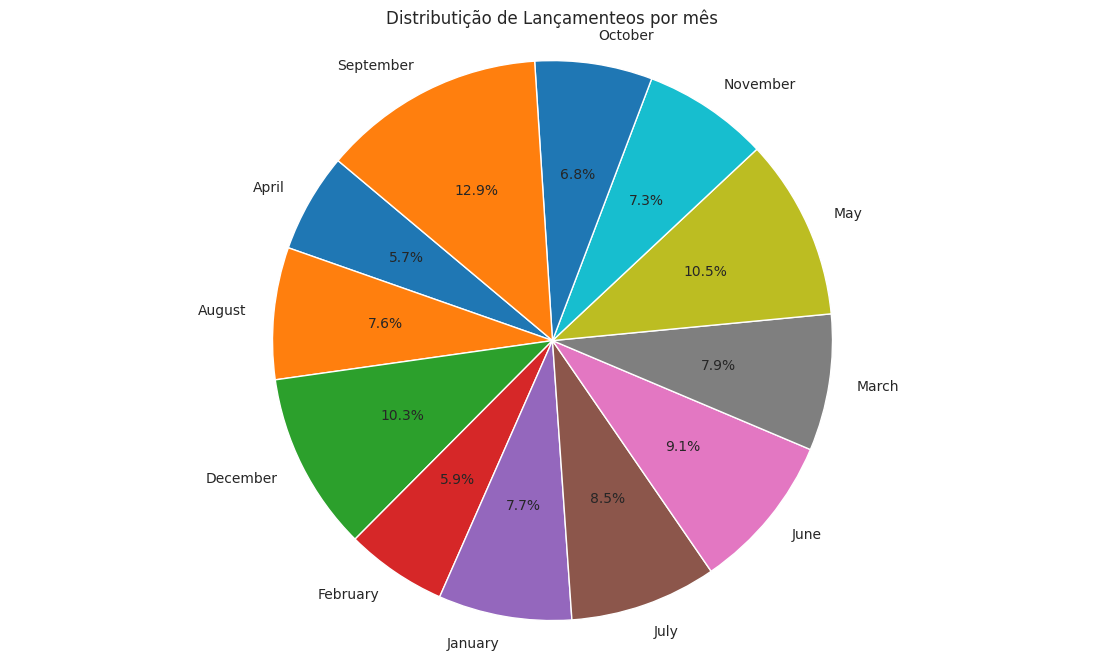

In [ ]:
#Lançamenteos por mês
df['release_month'] = df['release_date'].dt.month_name()
month_counts = df['release_month'].value_counts().sort_index()
plt.figure(figsize=(14, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distributição de Lançamenteos por mês')
plt.axis('equal')
plt.show()

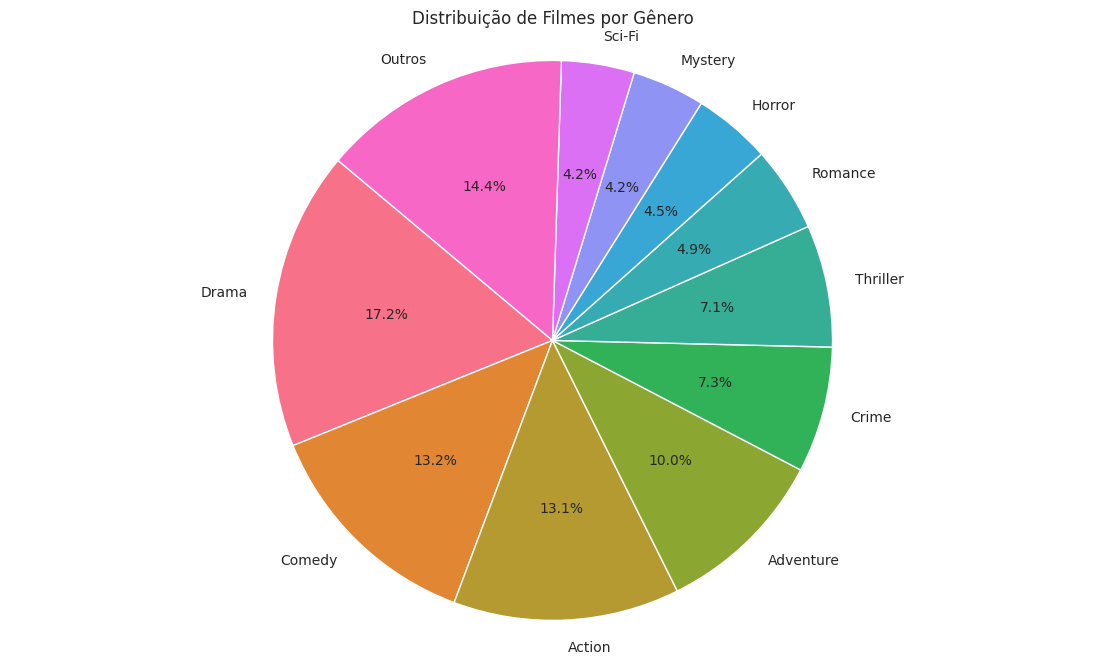

In [ ]:
# Explodir os gêneros para contar a distribuição
genres_counts = df['genres'].str.split(',').explode().value_counts()

# Separar os 10 gêneros mais comuns
top_10_genres = genres_counts.nlargest(10)

# Agrupar os demais gêneros como 'Outros'
resto = genres_counts[~genres_counts.index.isin(top_10_genres.index)].sum()
top_10_genres['Outros'] = resto  # Nome da categoria como 'Restante'

# Cores para os gêneros
colors = sns.color_palette("husl", len(top_10_genres))  # Usando uma paleta de 11 cores

# Configurar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar gráfico de pizza para a distribuição dos gêneros
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuição de Filmes por Gênero')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja circular
plt.show()

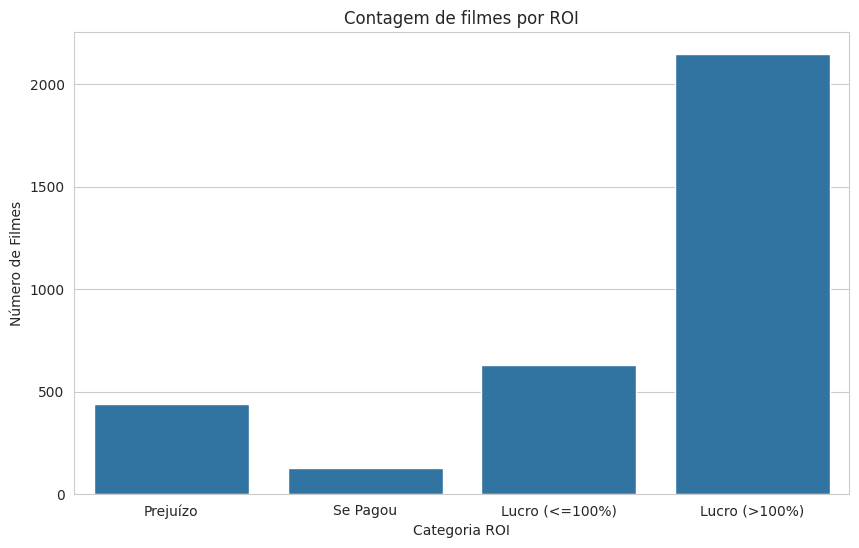

In [ ]:
'''
Analisando ROI (return of investment)
Prejuízo: ROI menor que -10% (ou seja, perda superior a 10% do investimento).
Se Pagou: ROI entre -10% e 10% (o filme pelo menos recuperou o investimento).
Lucro (<=100%): ROI entre 10% e 100% (lucro de até 100% do investimento).
Lucro (>100%): ROI superior a 100% (lucro acima do dobro do investimento).
'''
df['roi'] = (df['gross'] - df['budget']) / df['budget']
roi_categories = pd.cut(df['roi'], bins=[-np.inf, -0.1, 0.1, 1, np.inf], labels=['Prejuízo', 'Se Pagou', 'Lucro (<=100%)', 'Lucro (>100%)'])
roi_counts = roi_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_counts.index, y=roi_counts.values)
plt.title('Contagem de filmes por ROI')
plt.xlabel('Categoria ROI')
plt.ylabel('Número de Filmes')
plt.show()

<ipython-input-20-3fbec0f1f276>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_year_sorted, x='release_year', y='roi', palette="viridis")


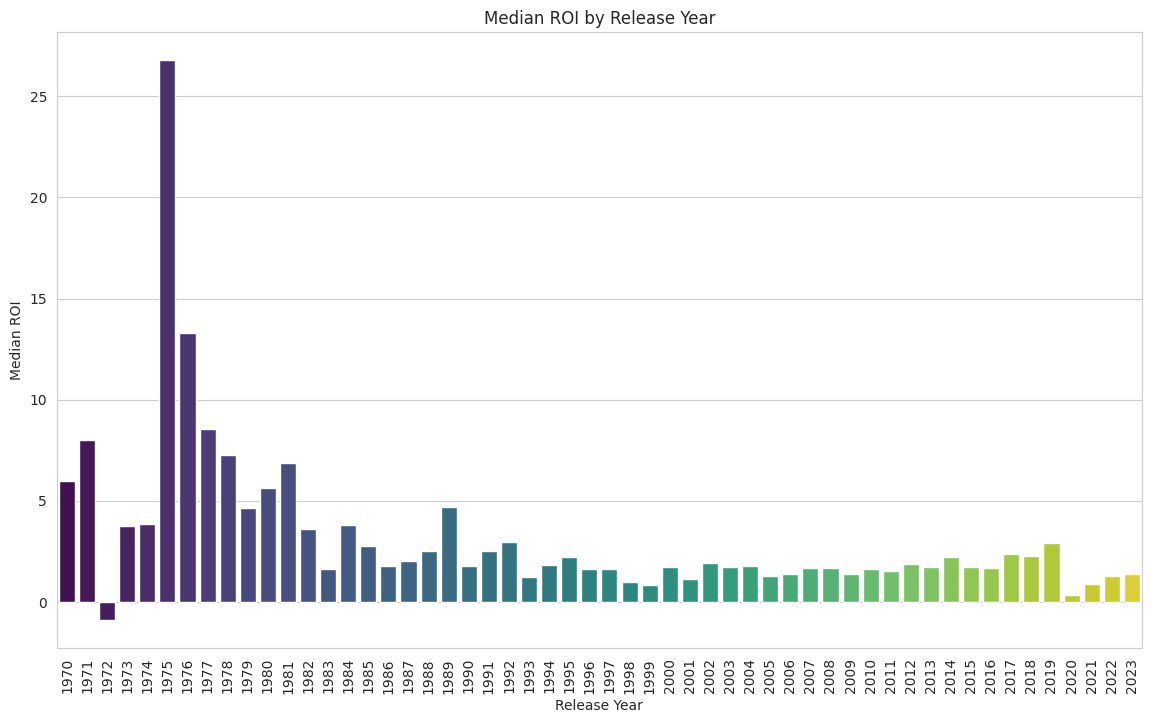

In [ ]:
# Bar chart of the median ROI by release year
df['release_year'] = df['release_date'].dt.year
df['roi'] = (df['gross'] - df['budget']) / df['budget']
roi_by_year = df.groupby('release_year')['roi'].median().reset_index()
roi_by_year_sorted = roi_by_year.sort_values('roi', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=roi_by_year_sorted, x='release_year', y='roi', palette="viridis")
plt.xticks(rotation=90)
plt.title('Median ROI by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Median ROI')
plt.show()

<ipython-input-21-45c65f46e261>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


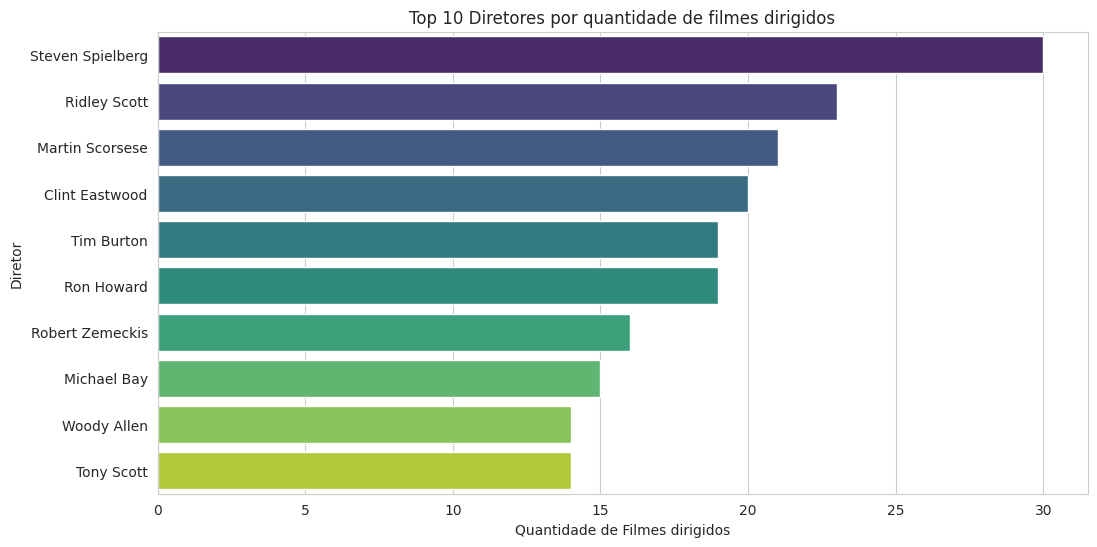

<ipython-input-21-45c65f46e261>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_directors_movies, x='director', y='averageRating', palette="viridis")


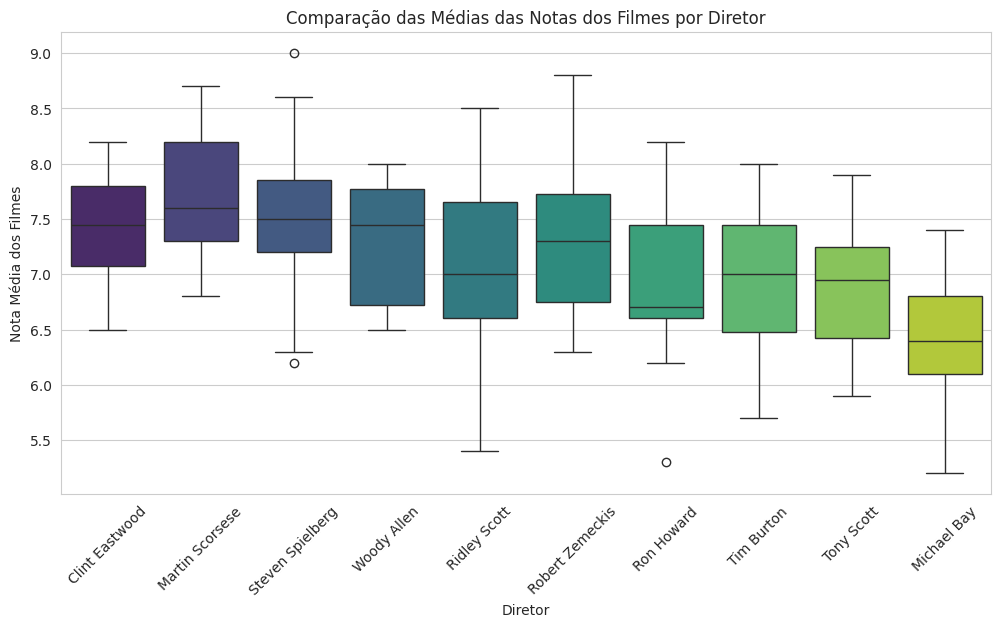

In [ ]:
# Analise de Diretores
df_directors = df['directors'].str.split(',').explode()
top_directors = df_directors.value_counts().head(10)
top_directors_movies = df[df['directors'].isin(top_directors.index)]
top_directors_movies = top_directors_movies.assign(director=top_directors_movies['directors'].str.split(',')).explode('director')
top_directors_movies = top_directors_movies[top_directors_movies['director'].isin(top_directors.index)]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top 10 Diretores por quantidade de filmes dirigidos')
plt.xlabel('Quantidade de Filmes dirigidos')
plt.ylabel('Diretor')
plt.show()

# Boxplot to compare the average ratings of films among top directors
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_directors_movies, x='director', y='averageRating', palette="viridis")
plt.xticks(rotation=45)
plt.title('Comparação das Médias das Notas dos Filmes por Diretor')
plt.xlabel('Diretor')
plt.ylabel('Nota Média dos Filmes')
plt.show()

<ipython-input-32-40807ad41544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")


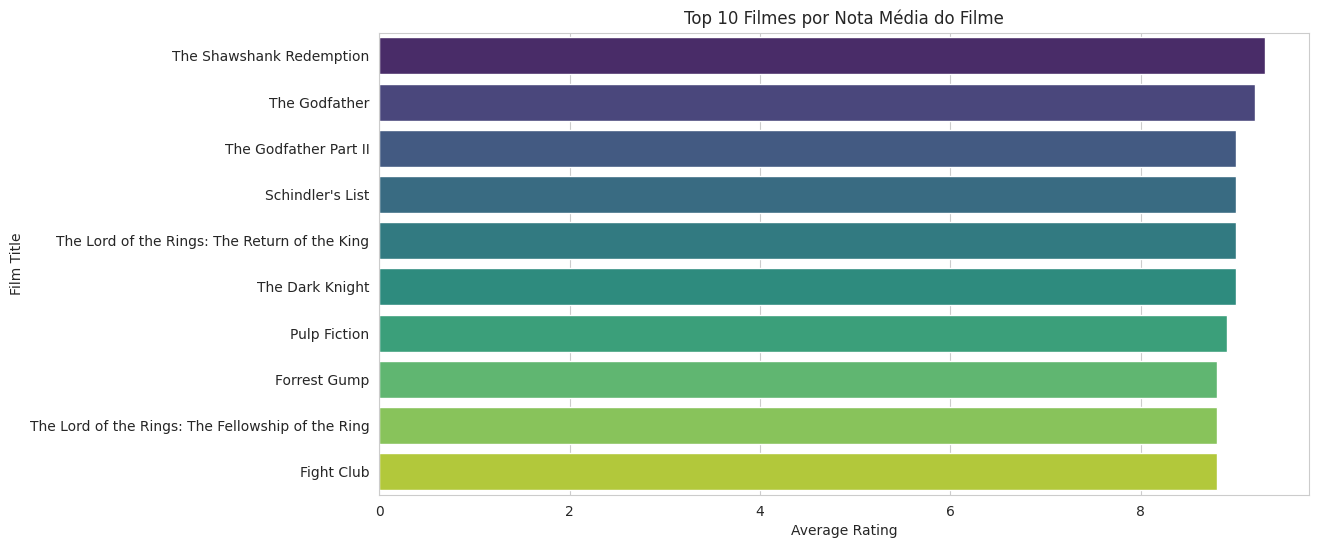

<ipython-input-32-40807ad41544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")


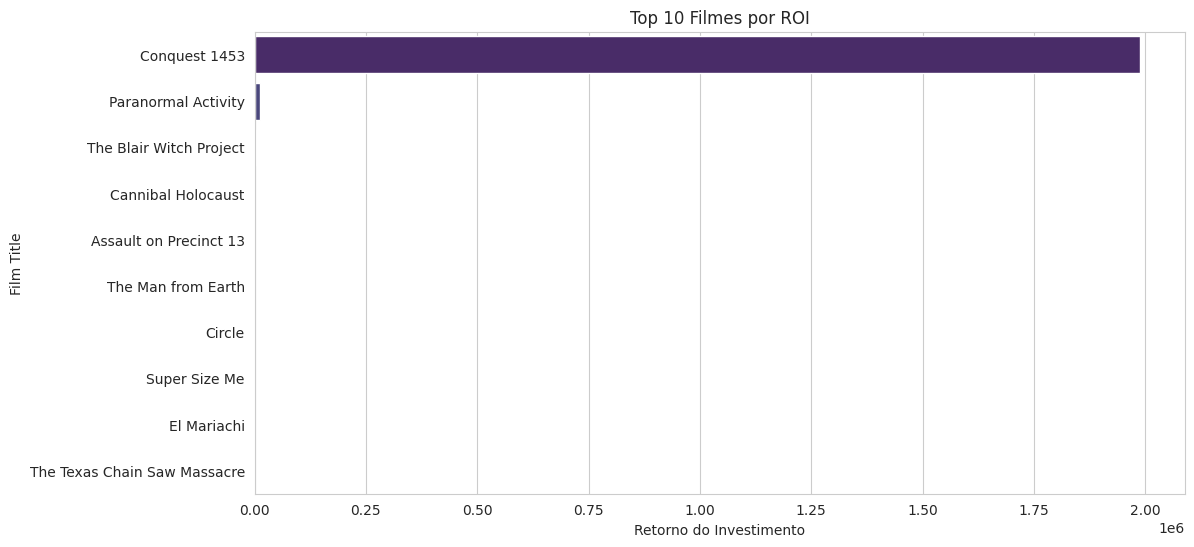

<ipython-input-32-40807ad41544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")


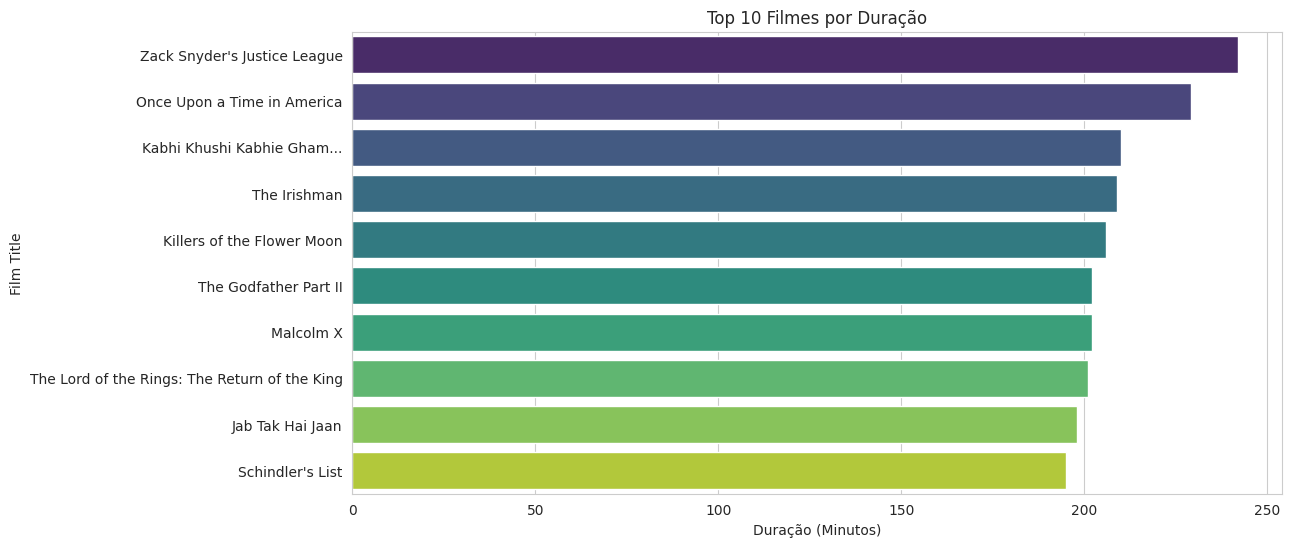

In [ ]:
# Bar charts for top 10 films by ratings, by ROI, and by runtimes
def plot_top_films(df, column, title, xlabel, ylabel):
    top_films = df.nlargest(10, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")
    plt.title(f'Top 10 Filmes por {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_top_films(df, 'averageRating', 'Nota Média do Filme', 'Average Rating', 'Film Title')
plot_top_films(df, 'roi', 'ROI', 'Retorno do Investimento', 'Film Title')
plot_top_films(df, 'runtimeMinutes', 'Duração', 'Duração (Minutos)', 'Film Title')

<ipython-input-34-f2576632e4ac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")


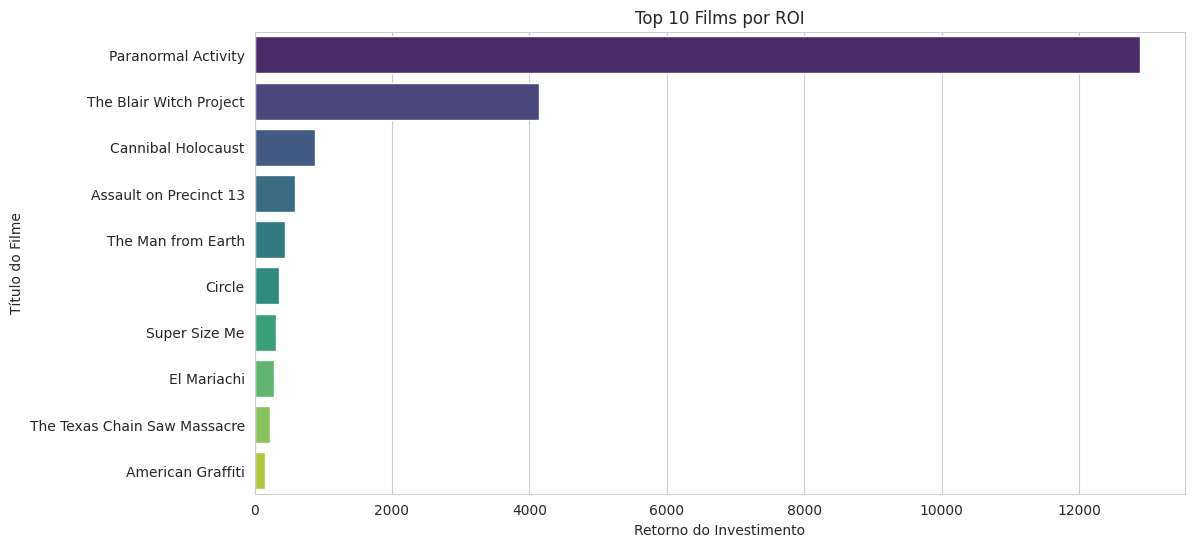

In [ ]:
'''
Podemos ver no exemplo anteriro podemos ver um caso de outlier, o filme "Conquest 1453" teve um ROI (return of investiment)
muito maior em relação aos demais filmes da nossa lista, isso devido provavelmente à um erro de digitação no conjunto de dados
para ter uma analise mais precisa, podemos remover esse outlier
'''
# Excluin a entrada 'Conquest 1453', temos um resultado menos poluído, facilitando a visualização dos filmes com maior ROI
df_sem_conquest = df.drop(df.loc[df['primaryTitle'] == 'Conquest 1453'].index)

# Função para plotar os 10 melhores filmes
def plot_top_films(df, column, title, xlabel, ylabel):
    top_films = df.nlargest(10, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")
    plt.title(f'Top 10 Films por {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotar os 10 melhores filmes por ROI, excluindo 'Conquest 1453'
plot_top_films(df_sem_conquest, 'roi', 'ROI', 'Retorno do Investimento', 'Título do Filme')

<ipython-input-34-f2576632e4ac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")


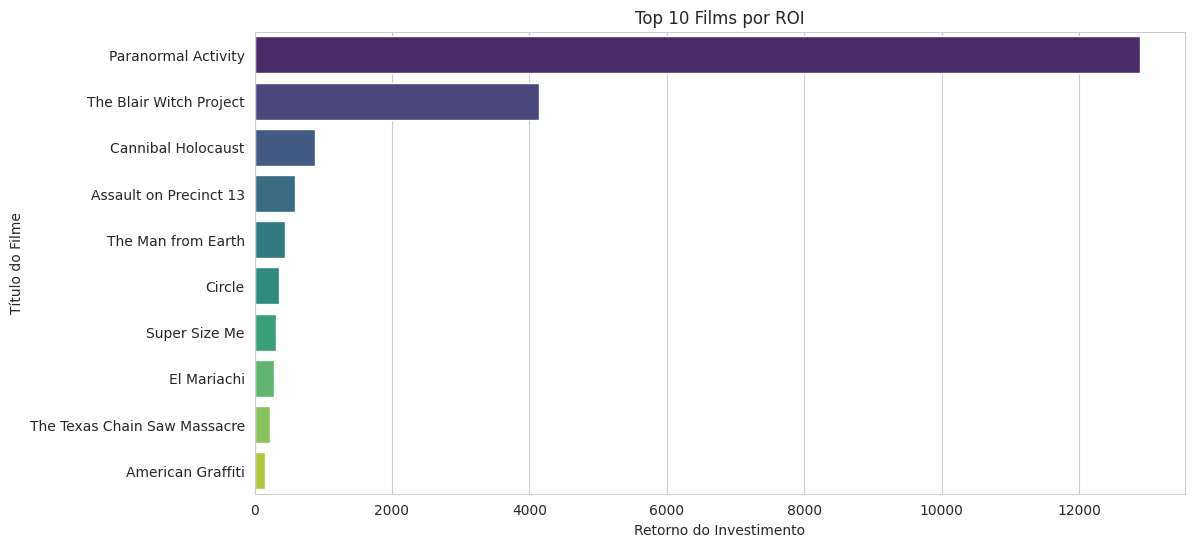

In [ ]:
'''
Outra maneira de lidar com o problema, é substituindo o valor incorreto no budget do Conquest 1453, e plotar o gráfico novamente
'''
df_corrigido=df.copy()
df_corrigido.loc[df_corrigido['primaryTitle'] == 'Conquest 1453', 'budget'] = 18200000
df_corrigido['roi'] = (df_corrigido['gross'] - df_corrigido['budget']) / df_corrigido['budget']

plot_top_films(df_corrigido, 'roi', 'ROI', 'Retorno do Investimento', 'Título do Filme')


In [ ]:
'''
uma outra analise que podemos fazer sobre o ROI, é classificando primeiro os filmes pelo faturamento, dessa forma podemos medir a performance
de filmes BlockBuster por exemplo, que são grandes produções de estudios famosos e geralmente tem grande retorno financeiro
'''
df_sorted = df.sort_values(by=['gross', 'roi'], ascending=False)

# Exibir as primeiras linhas do DataFrame ordenado
df_sorted.head(10)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,release_year,release_month,roi
1762,tt0499549,Avatar,Avatar,0,162,"Action,Adventure,Fantasy",7.9,1364568,237000000,2.923706e+09,2009-12-10,James Cameron,2009,December,11.336312
3055,tt4154796,Avengers: Endgame,Avengers: Endgame,0,181,"Action,Adventure,Drama",8.4,1224453,356000000,2.799439e+09,2019-04-18,"Anthony Russo, Joe Russo",2019,April,6.863593
2514,tt1630029,Avatar: The Way of Water,Avatar: The Way of Water,0,192,"Action,Adventure,Fantasy",7.6,466743,350000000,2.320250e+09,2022-12-06,James Cameron,2022,December,5.629287
726,tt0120338,Titanic,Titanic,0,194,"Drama,Romance",7.9,1252486,200000000,2.264743e+09,1997-11-01,James Cameron,1997,November,10.323717
2850,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,138,"Action,Adventure,Sci-Fi",7.8,960165,245000000,2.071310e+09,2015-12-14,J.J. Abrams,2015,December,7.454327
3054,tt4154756,Avengers: Infinity War,Avengers: Infinity War,0,149,"Action,Adventure,Sci-Fi",8.4,1164767,321000000,2.052415e+09,2018-04-23,"Anthony Russo, Joe Russo",2018,April,5.393816
2051,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home,0,148,"Action,Adventure,Fantasy",8.2,841498,200000000,1.921847e+09,2021-12-13,Jon Watts,2021,December,8.609236
1368,tt0369610,Jurassic World,Jurassic World,0,124,"Action,Adventure,Sci-Fi",6.9,668305,150000000,1.671537e+09,2015-05-29,Colin Trevorrow,2015,May,10.143583
3201,tt6105098,The Lion King,The Lion King,0,118,"Adventure,Animation,Drama",6.8,260956,260000000,1.663075e+09,2019-07-09,Jon Favreau,2019,July,5.396444
1859,tt0848228,The Avengers,The Avengers,0,143,"Action,Sci-Fi",8.0,1438396,220000000,1.520539e+09,2012-04-11,Joss Whedon,2012,April,5.911539


<ipython-input-26-94ddad73982a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='roi', y='primaryTitle', data=top_10, palette='viridis')


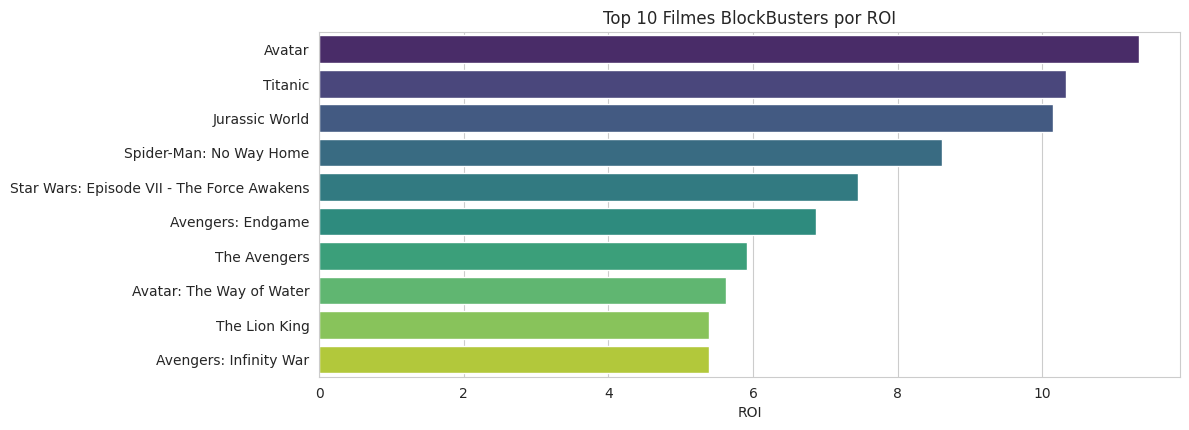

In [ ]:
# Selecionar as primeiras 10 linhas para plotar, ordenando pelo ROI
top_10 = df_sorted.head(10).sort_values(by='roi', ascending=False)

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar gráfico de barras horizontais para ROI
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo subplot
sns.barplot(x='roi', y='primaryTitle', data=top_10, palette='viridis')
plt.title('Top 10 Filmes BlockBusters por ROI')
plt.xlabel('ROI')
plt.ylabel('')

# Ajustar o layout
plt.tight_layout()
plt.show()